In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('tweets_gsdmm_clusters.csv',parse_dates = ['tweet_timestamp'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320924 entries, 0 to 320923
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   tweet_ID             320924 non-null  int64         
 1   user_id              320924 non-null  int64         
 2   keywords             320924 non-null  object        
 3   tweet_timestamp      320924 non-null  datetime64[ns]
 4   valence_intensity    320924 non-null  float64       
 5   fear_intensity       320924 non-null  float64       
 6   anger_intensity      320924 non-null  float64       
 7   happiness_intensity  320924 non-null  float64       
 8   sadness_intensity    320924 non-null  float64       
 9   sentiment            320924 non-null  int64         
 10  emotion              267415 non-null  object        
 11  tweet_text           320924 non-null  object        
 12  tokens               320924 non-null  object        
 13  cluster       

tweet_ID              user_id keywords     tweet_timestamp  \
0  1221998335302623233             21369285    wuhan 2020-01-28 03:28:01   
1  1222002104736202752             37616952    wuhan 2020-01-28 03:43:00   
2  1222005788610375681            436429668    wuhan 2020-01-28 03:57:38   
3  1222014082254901248           2269557301    wuhan 2020-01-28 04:30:35   
4  1222014652495757312  1063639586113380352    wuhan 2020-01-28 04:32:51   

   valence_intensity  fear_intensity  anger_intensity  happiness_intensity  \
0              0.495           0.522            0.418                0.350   
1              0.263           0.638            0.580                0.163   
2              0.513           0.426            0.383                0.323   
3              0.544           0.335            0.399                0.395   
4              0.579           0.418            0.317                0.356   

   sadness_intensity  sentiment emotion  \
0              0.433          0     NaN   
1              0.606         -2       F   
2              0.445          0     NaN   
3              0.356          1       H   
4              0.332          1       H   

                                          tweet_text  \
0  Coronavirus: 110 people in 26 states 'under in...   
1  @icao #icao still excluding #Taiwan even durin...   
2  We will have reports and analysis throughout t...   
3  Here is what I’ve found out so far.(WUHAN\n\nF...   
4  #SouthKorea - President Moon Jae-in visits the...   

                                              tokens  cluster      topic_name  
0  ['people', 'state', 'investigation', 'disease'...        1    Case Reports  
1  ['exclude', 'difficult', 'time', 'world', 'suf...       22  Global Economy  
2  ['report', 'analysis', 'nikkei', 'asian', 'rev...       10      New Normal  
3  ['ve', 'far', 'city', 'million', 'call', 'econ...        0  Global Economy  
4  ['president', 'moon', 'jae', 'visit', 'nationa...        4    Restrictions

In [3]:
df.fillna('NA',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320924 entries, 0 to 320923
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   tweet_ID             320924 non-null  int64         
 1   user_id              320924 non-null  int64         
 2   keywords             320924 non-null  object        
 3   tweet_timestamp      320924 non-null  datetime64[ns]
 4   valence_intensity    320924 non-null  float64       
 5   fear_intensity       320924 non-null  float64       
 6   anger_intensity      320924 non-null  float64       
 7   happiness_intensity  320924 non-null  float64       
 8   sadness_intensity    320924 non-null  float64       
 9   sentiment            320924 non-null  int64         
 10  emotion              320924 non-null  object        
 11  tweet_text           320924 non-null  object        
 12  tokens               320924 non-null  object        
 13  cluster       

In [4]:
df['topic_name'] = df['topic_name'].replace(['Treatment'], 'Treatments')

In [5]:
topics_counts = df.groupby(df['topic_name']).size()
print(topics_counts.sort_values())

topic_name
Origin of the Virus     8591
Hospital Shortage       9562
Events                 13381
Olympics               16721
Misinformation         17436
Health                 28664
Preventing Covid       33175
Global Economy         35242
Restrictions           38156
Treatments             38929
Case Reports           40362
New Normal             40705
dtype: int64


In [6]:
cluster_counts = df.groupby(df['cluster']).size()
print(cluster_counts.sort_values())

cluster
25      954
23     2386
28     2705
12     4290
7      4438
2      5813
9      7221
3      7235
5      7568
19     8591
13     8592
18     9192
14     9562
17     9896
29    10215
22    10261
20    11477
16    11890
10    12503
8     13172
11    13279
0     13403
15    13983
1     14679
24    14681
21    17058
4     17749
6     18306
26    18580
27    21245
dtype: int64


C:\Users\iniad\AppData\Local\Temp\ipykernel_14728\3956137933.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey')


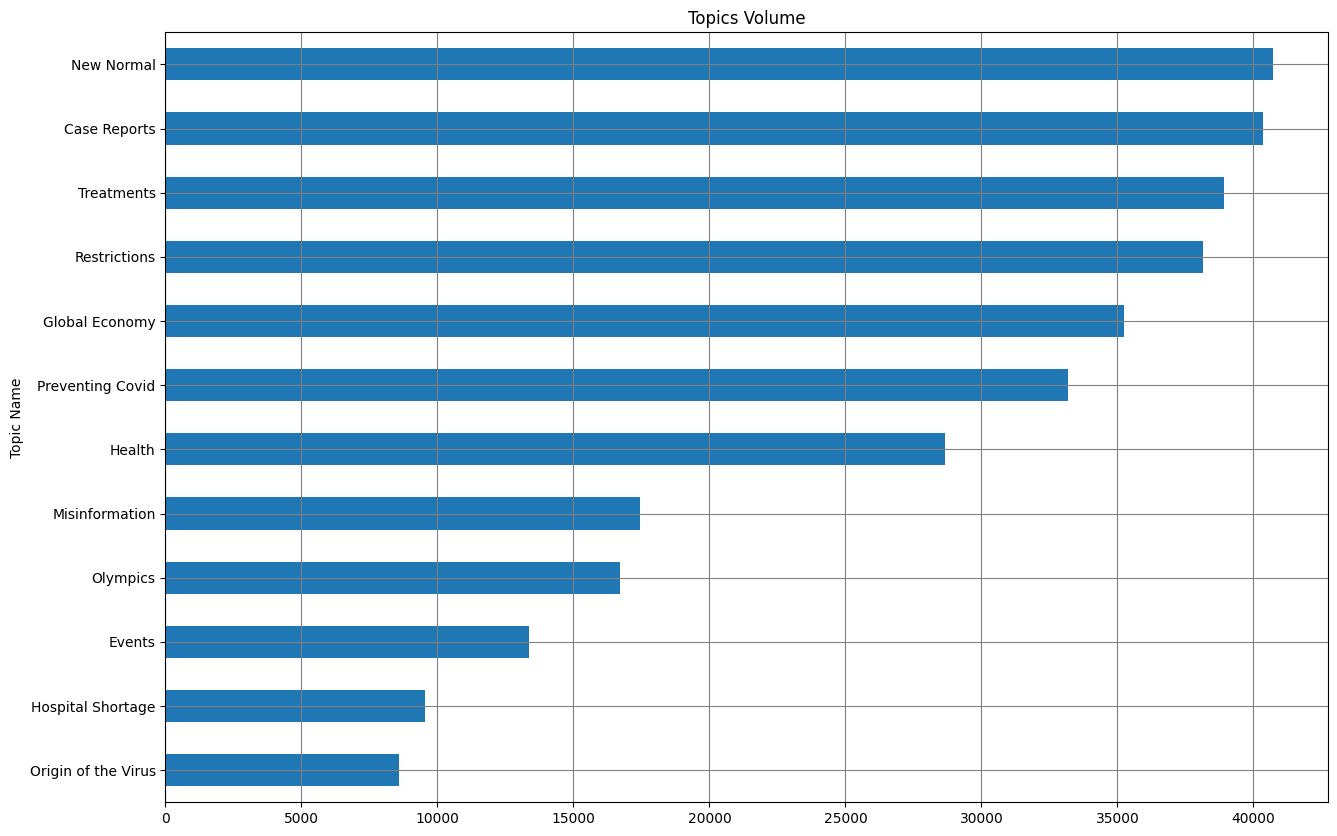

In [32]:
ax = topics_counts.sort_values().plot.barh(title = "Topics Volume",figsize=(15, 10),ylabel = 'Topic Name' )
ax.grid(b = True, color ='grey')
fig = ax.figure 
fig.savefig('topics_volume.png')

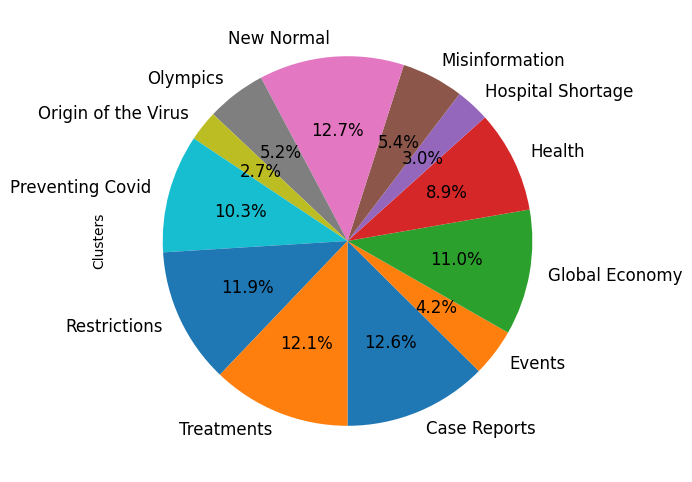

In [8]:

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
topics_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="Clusters")
plt.show()

In [9]:
df_t0 = df[df['topic_name'] == 'Global Economy']

sentiment_0 = df_t0.groupby(df['sentiment']).size()
sentiment_0

sentiment
-2     1445
-1    20914
 0     5681
 1     7156
 2       46
dtype: int64

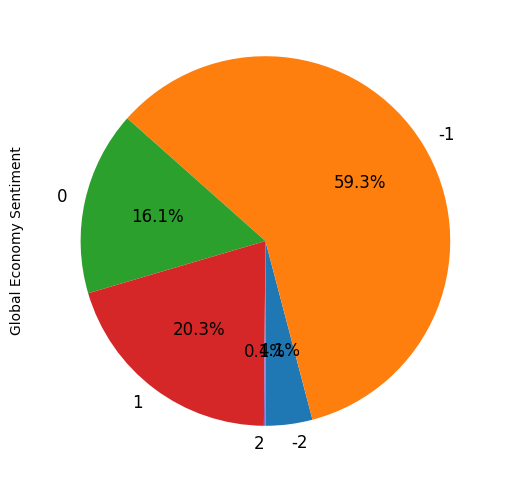

In [10]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_0.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="Global Economy Sentiment")
plt.show()

In [11]:
topics_names = df.topic_name.unique()
topics_names

array(['Case Reports', 'Global Economy', 'New Normal', 'Restrictions',
       'Olympics', 'Health', 'Origin of the Virus', 'Events',
       'Hospital Shortage', 'Preventing Covid', 'Treatments',
       'Misinformation'], dtype=object)

In [12]:
topics = {}
for i in topics_names:
    d = df[df['topic_name'] == i]
    t = d.groupby('sentiment').size()
    topics[i] = t

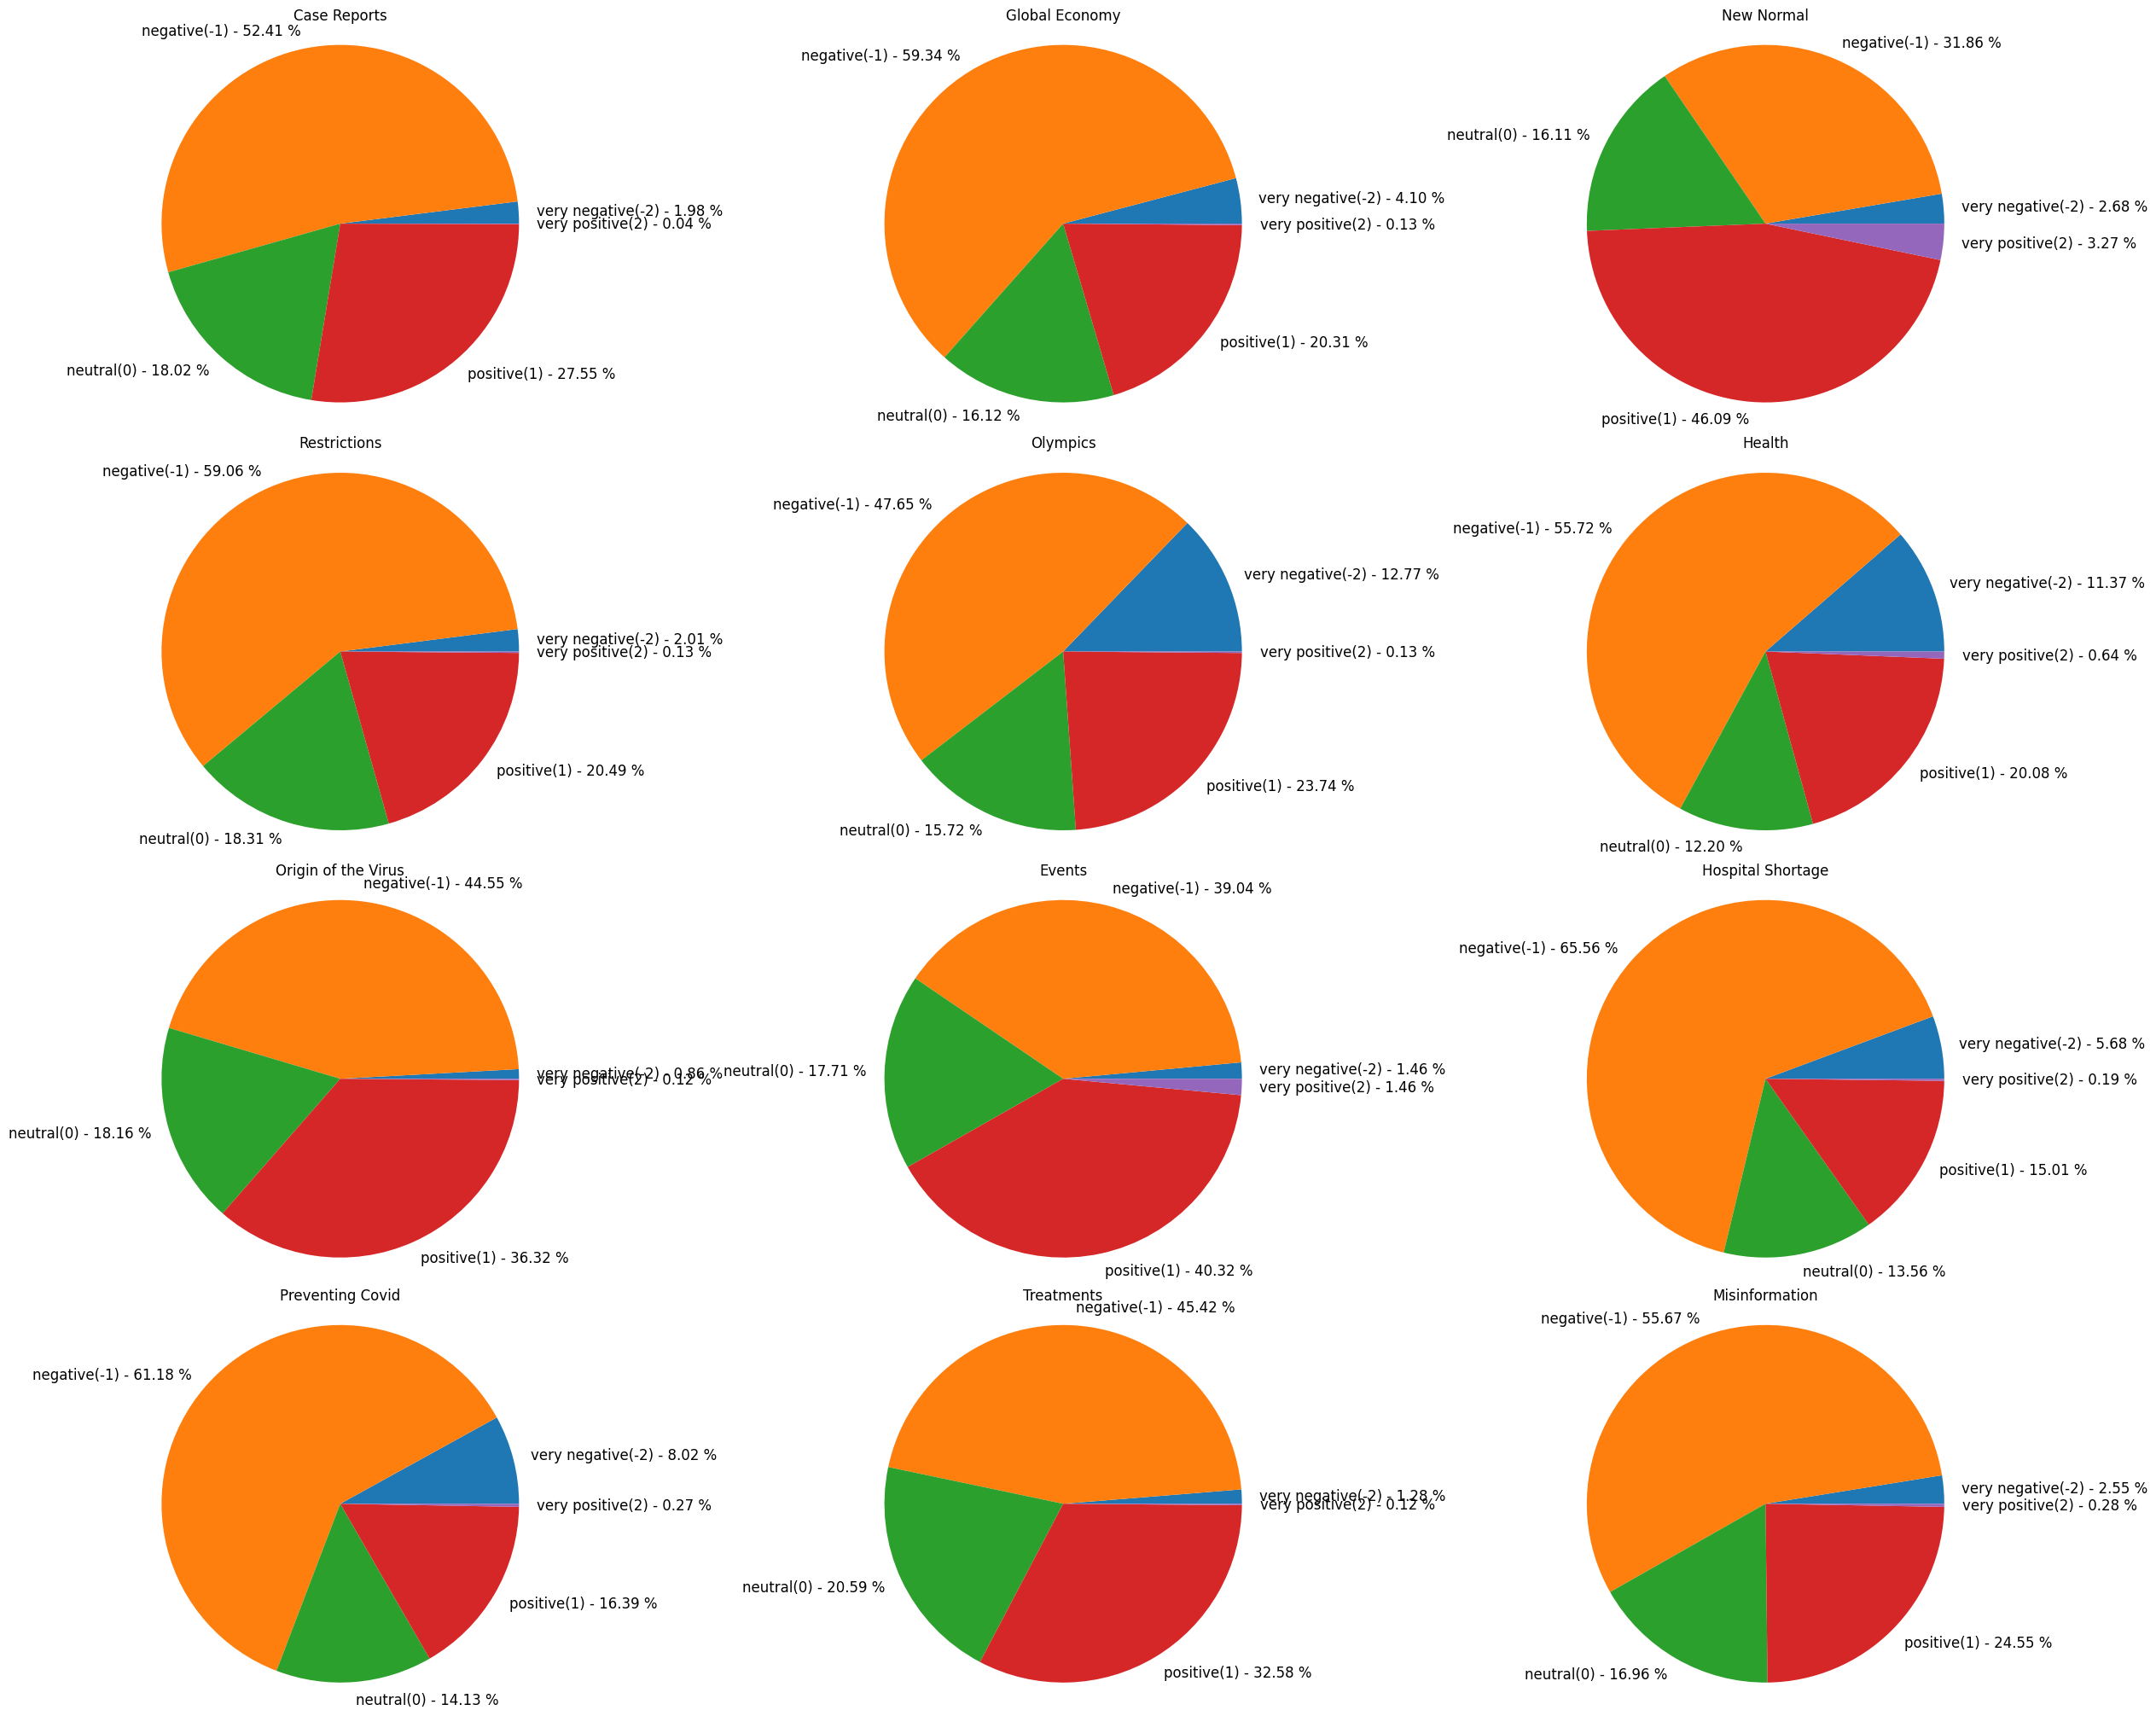

In [13]:
label = ['very negative(-2)', 'negative(-1)', 'neutral(0)', 'positive(1)', 'very positive(2)']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,20), dpi=100,constrained_layout = True)
#fig.tight_layout(pad=10.0)
axe = axes.ravel()
#explode = (0.05, 0.05, 0.05,0.05,0.05)
for i,var in enumerate(topics_names):
    percent = 100.*topics[var].values/topics[var].values.sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label, percent)]
    topics[var].plot(ax=axe[i],kind='pie', labels=labels,fontsize=12,title = var).axis('equal')
    axe[i].yaxis.label.set_visible(False)
    #axe[i].legend(labels, loc='upper right', fontsize=10)
    #topics[var].plot.pie(autopct='%1.1f%%',ax=axe[i], startangle=90,labeldistance=1.01,radius = 1.0, fontsize=12,title=var,pctdistance=0.5)

    
#plt.figlegend(label, loc = 'upper center')
#axes[0].set_ylabel('cumulative sum')


In [14]:
valence = df.groupby('topic_name').agg(valence_mean=('valence_intensity','mean'),valence_std=('valence_intensity','std'),valence_min=('valence_intensity','min'),valence_max=('valence_intensity','max'))

In [15]:
valence.sort_values(by='valence_mean',ascending=False)

valence_mean  valence_std  valence_min  valence_max
topic_name                                                              
New Normal               0.514069     0.103555        0.062        0.885
Events                   0.499123     0.093714        0.159        0.842
Treatments               0.481418     0.076455        0.163        0.826
Origin of the Virus      0.481353     0.070996        0.220        0.801
Case Reports             0.474118     0.077001        0.148        0.744
Misinformation           0.462557     0.084441        0.163        0.789
Restrictions             0.456520     0.076527        0.143        0.818
Global Economy           0.448782     0.085474        0.109        0.795
Olympics                 0.440365     0.107251        0.126        0.888
Hospital Shortage        0.432282     0.084914        0.125        0.781
Health                   0.431662     0.109520        0.017        0.851
Preventing Covid         0.431069     0.093159        0.037        0.849

<AxesSubplot: xlabel='topic_name'>

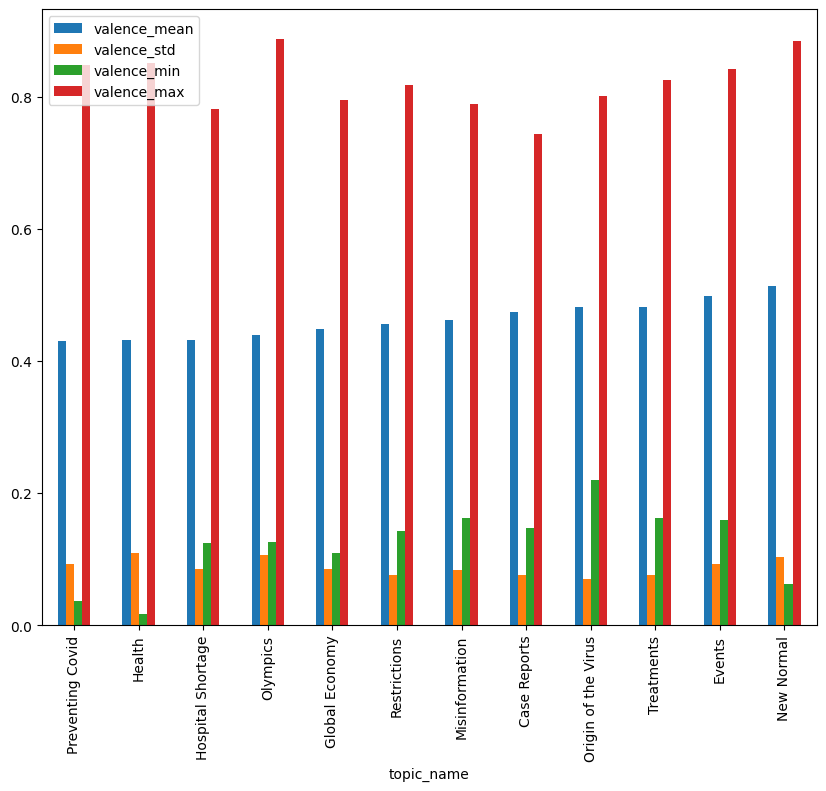

In [16]:
valence.sort_values(by='valence_mean').plot.bar(figsize=(10,8))

In [17]:
df_t= df.groupby(['topic_name',pd.Grouper(key='tweet_timestamp', axis=0,freq='W')]).size()
df_t = df_t.fillna(0)
df_w = df.groupby([pd.Grouper(key='tweet_timestamp', axis=0,freq='W')]).size()
df_w = df_w.fillna(0)

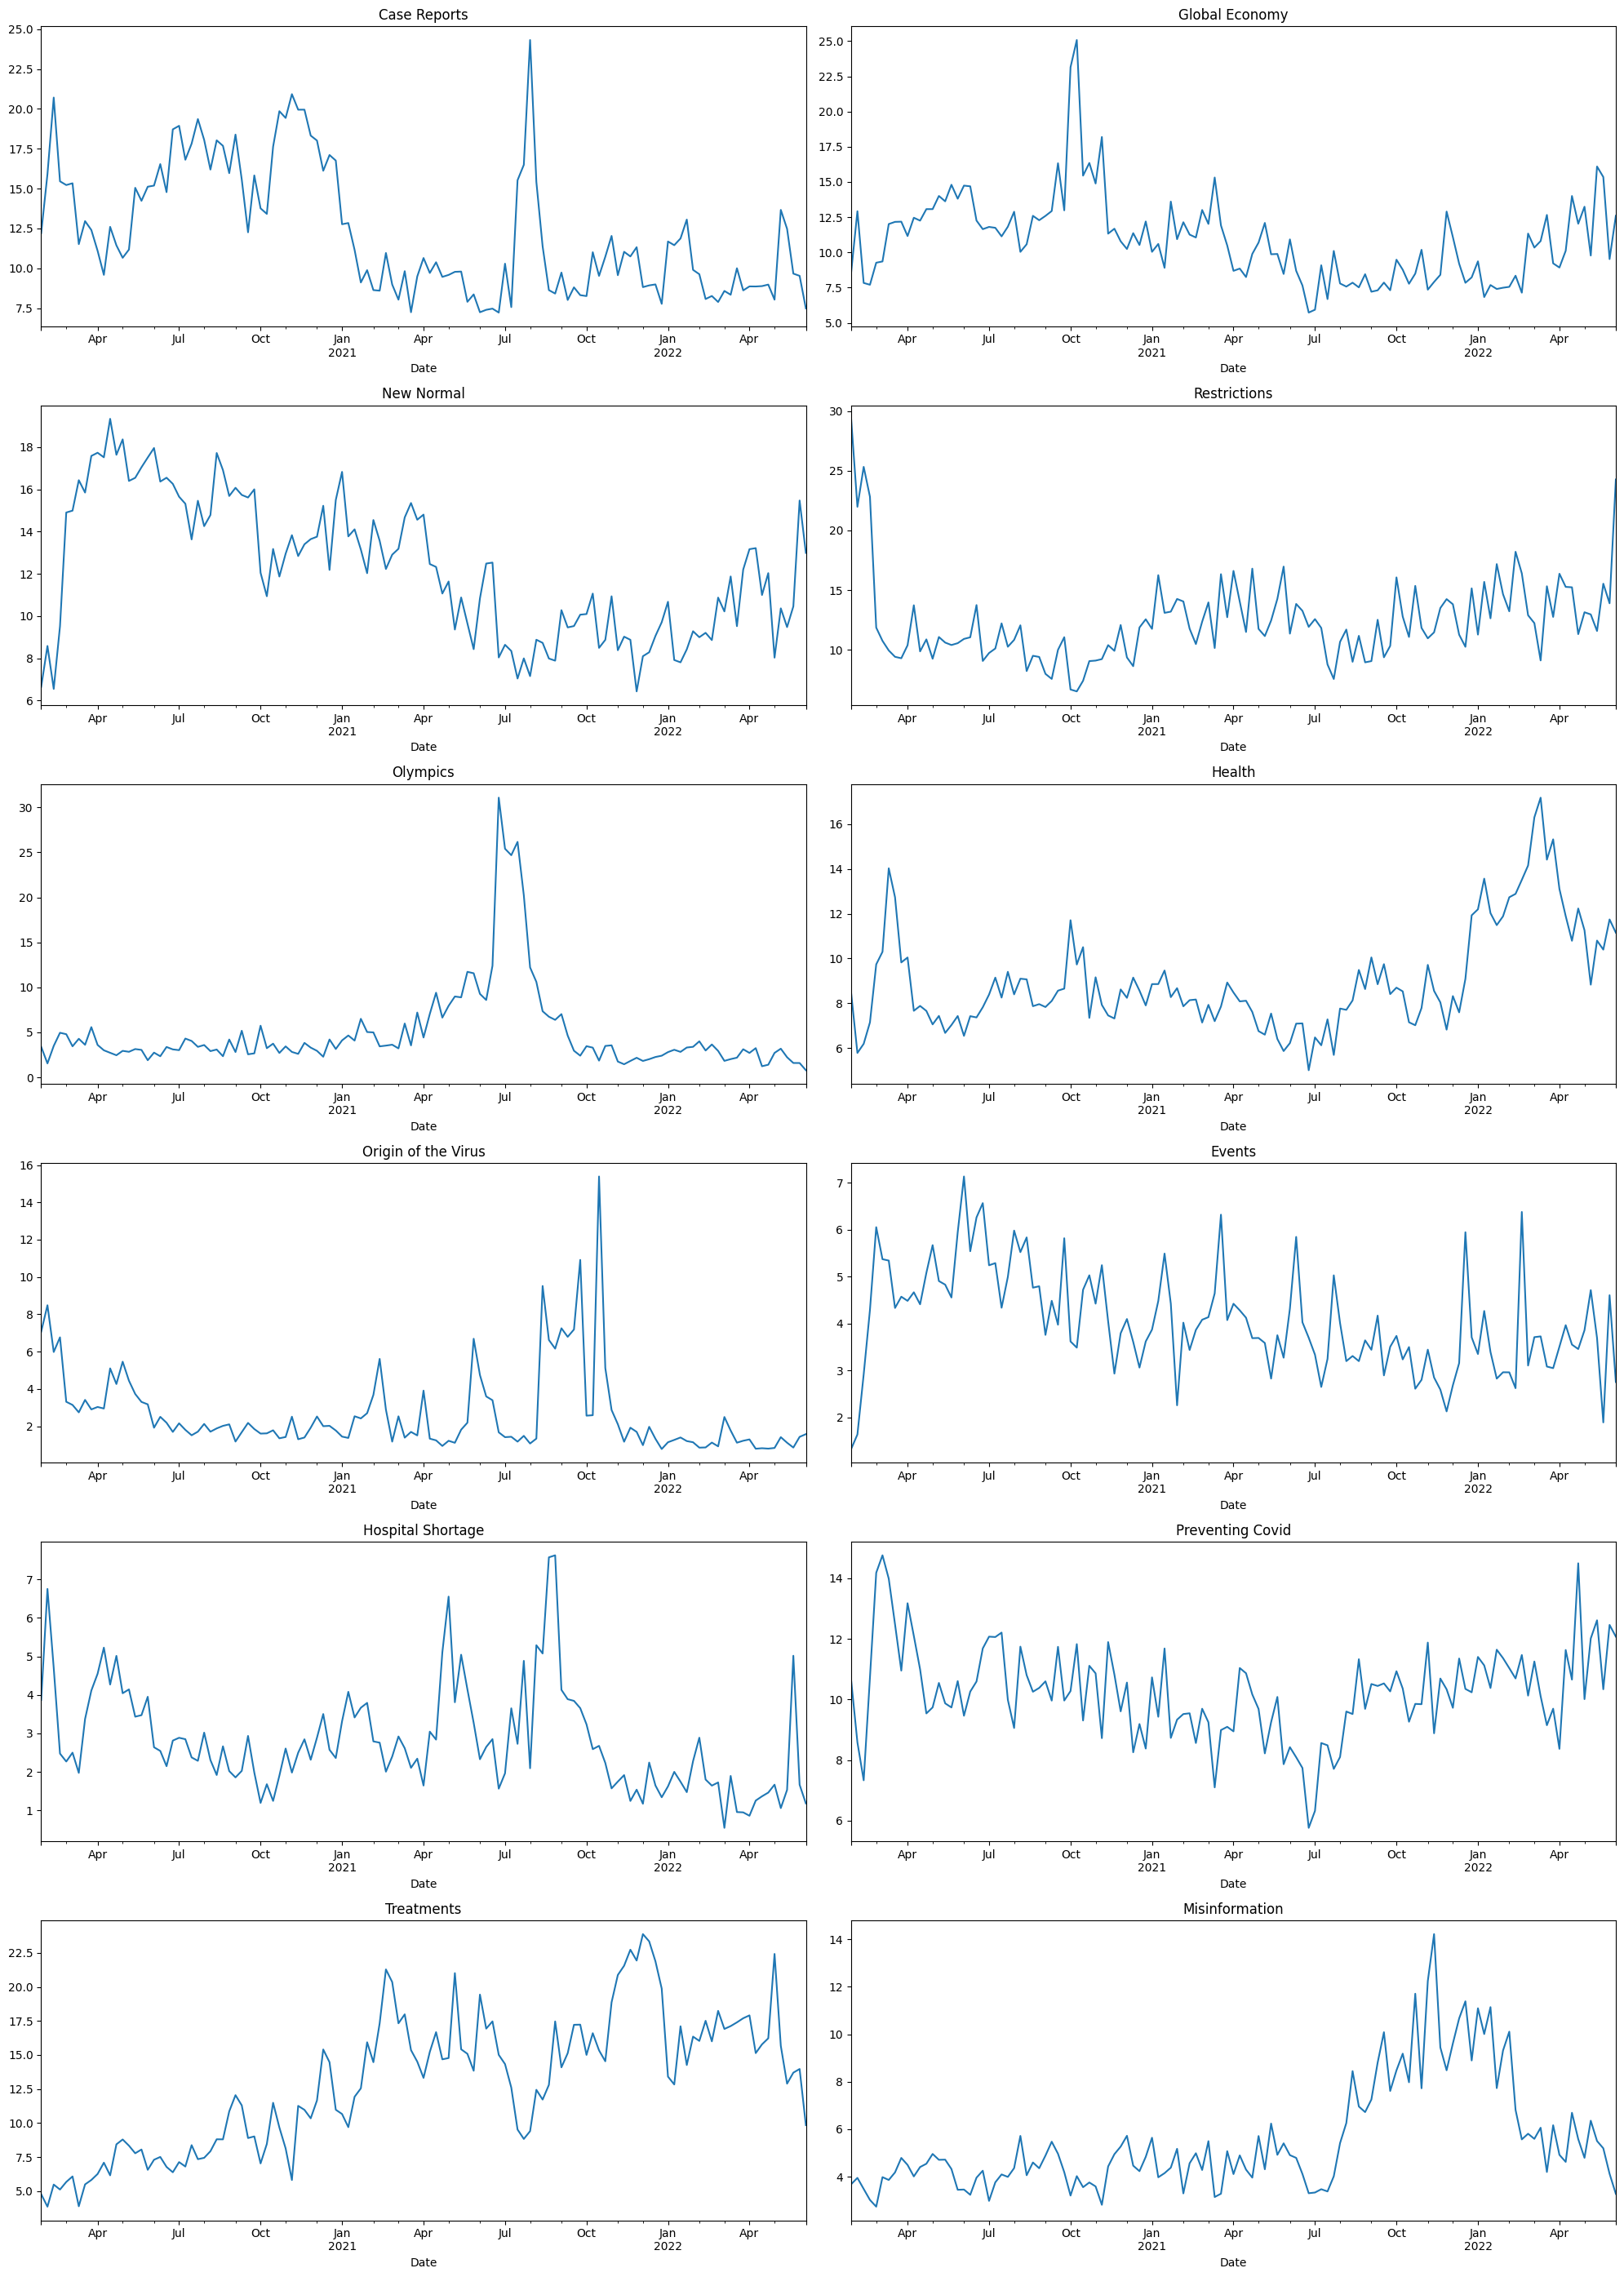

In [33]:
#label = ['very negative(-2)', 'negative(-1)', 'neutral(0)', 'positive(1)', 'very positive(2)']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,28), dpi=100)
axe = axes.ravel()

for i,var in enumerate(topics_names):
    ((df_t[var]/df_w)*100).plot(ax=axe[i], title = var,xlabel = "Date")
    #(df_t[var]).plot(ax=axe[i], title = var)
#plt.figlegend(label, loc = 'upper center')
#axes[0].set_ylabel('cumulative sum')
plt.tight_layout()
plt.show()
fig.savefig('topics_all_timeline.png')

In [19]:
df_em = df.loc[df.sentiment < 0]

In [20]:
df_em = df_em.groupby(['topic_name','emotion']).size()

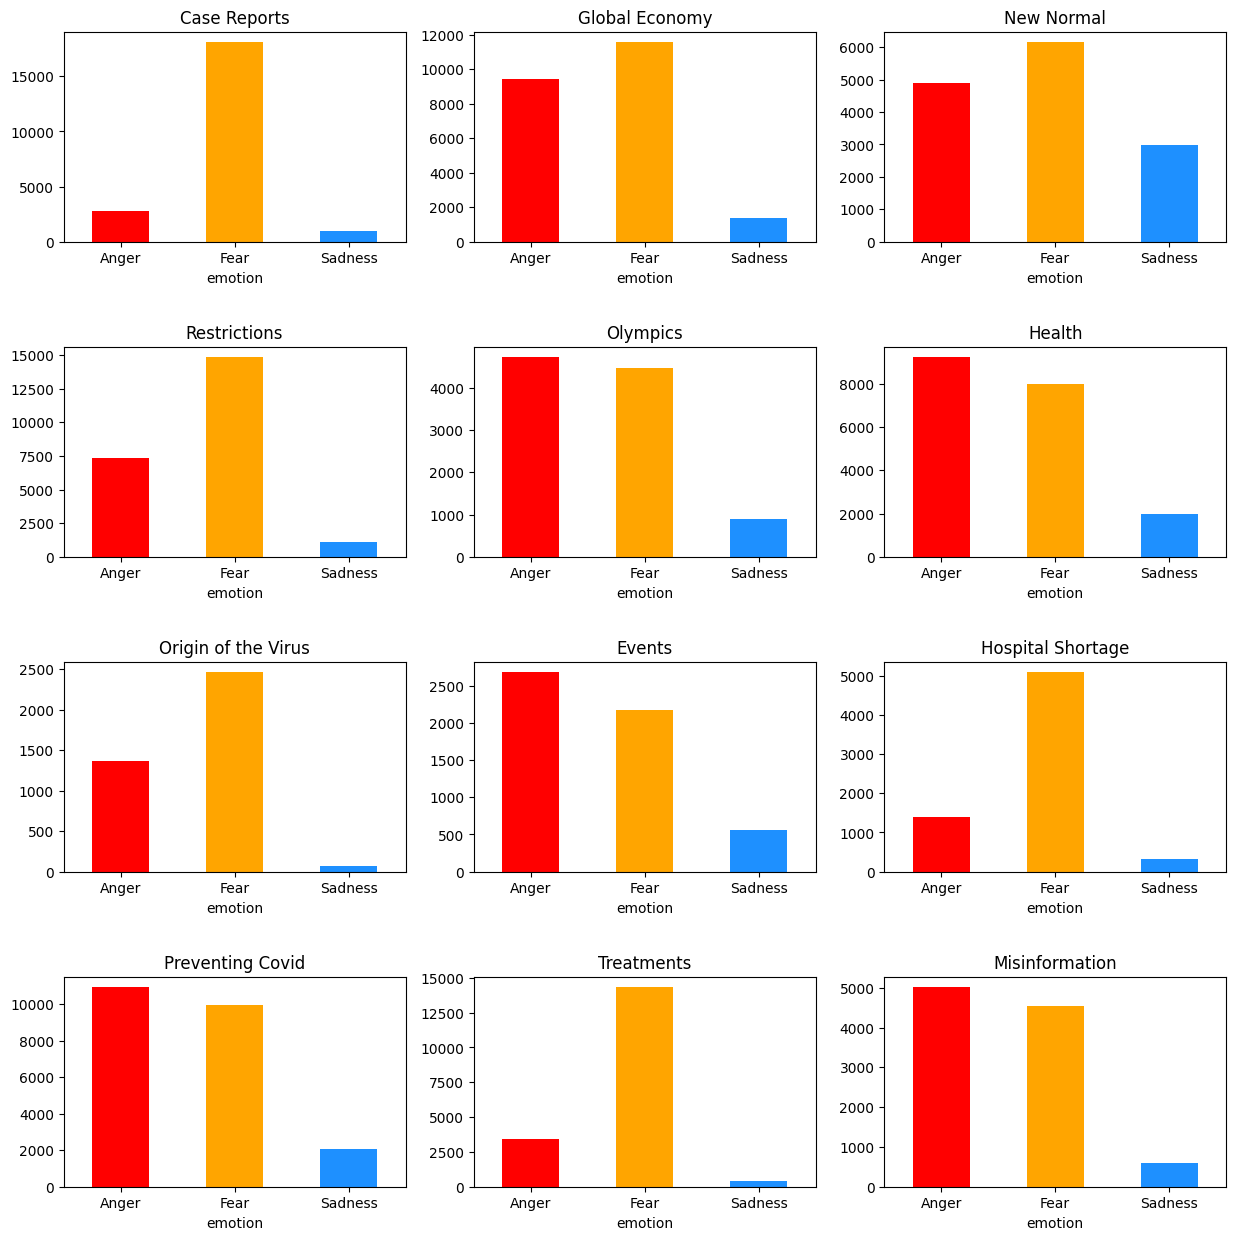

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15), dpi=100)
plt.subplots_adjust(hspace = 0.5)
axe = axes.ravel()

for i,var in enumerate(topics_names):
    df_em[var].plot.bar(ax=axe[i], title = var,color = ['red','orange','dodgerblue'])
    axe[i].set_xticklabels (['Anger','Fear','Sadness'],rotation = 'horizontal')

In [38]:
df_e = df[df['topic_name']=='Treatments']
#print(df_e.info())
df_es= df_e.groupby([pd.Grouper(key='tweet_timestamp', axis=0,freq='M'),'sentiment']).agg({'sentiment': 'size'})
df_es2 = df_es.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_es2 = df_es2['sentiment']
#print(df_es2)

C:\Users\iniad\AppData\Local\Temp\ipykernel_14728\2917889458.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_es2 = df_es.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


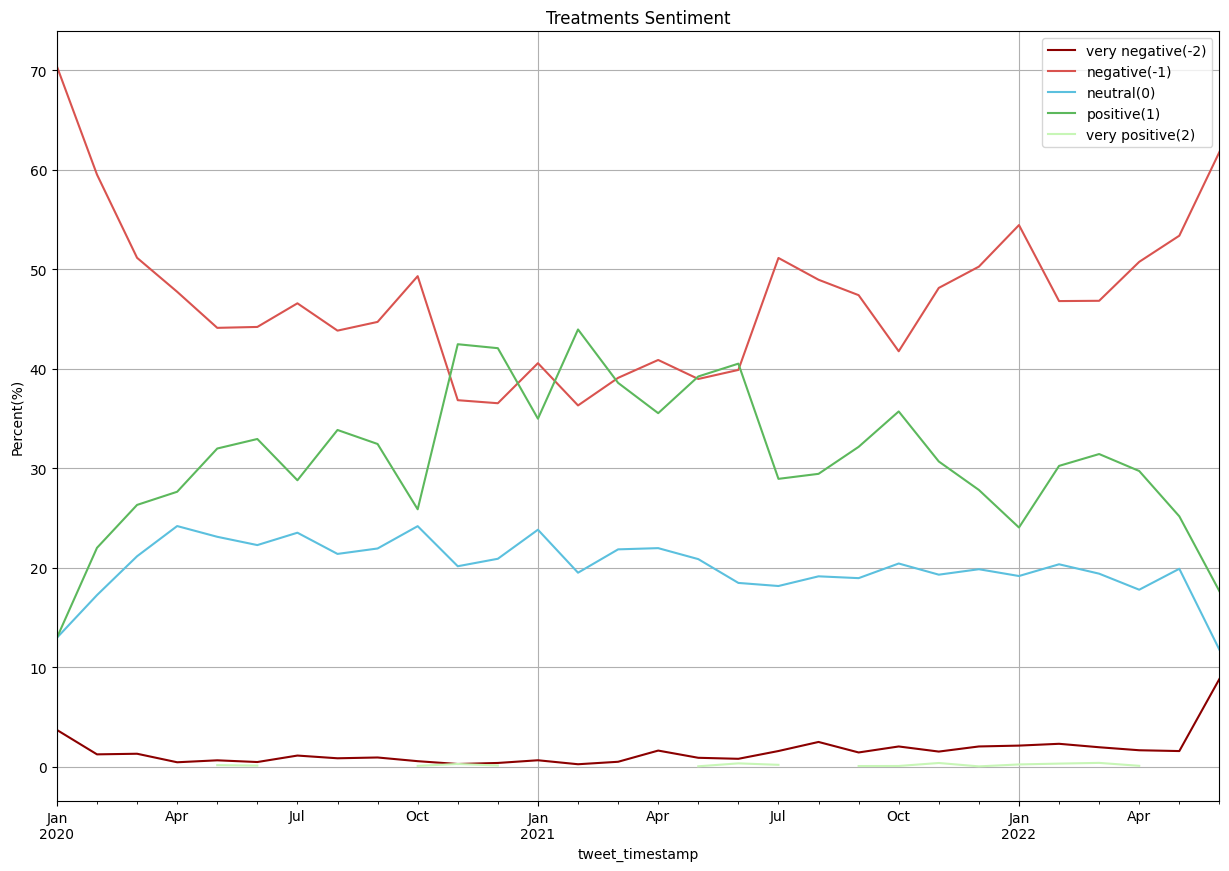

In [41]:
plt5 = df_es2.unstack(level=-1).plot(title='Treatments Sentiment', grid=True,figsize=(15, 10),ylabel = 'Percent(%)',color=['#8b0000','#d9534f','#5bc0de','#5cb85c','#c7f6b6'])
plt5.legend(label,loc = 'upper right')
fig = plt5.figure 
fig.savefig('treatments_percent.png')

In [24]:
df_health = df[df['topic_name']=='Olympics']
#print(df_e.info())
df_health= df_health.groupby([pd.Grouper(key='tweet_timestamp', axis=0,freq='W'),'sentiment']).agg({'sentiment': 'size'})
df_health = df_health.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_health = df_health['sentiment']
#print(df_health)

C:\Users\iniad\AppData\Local\Temp\ipykernel_14728\654971231.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_health = df_health.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


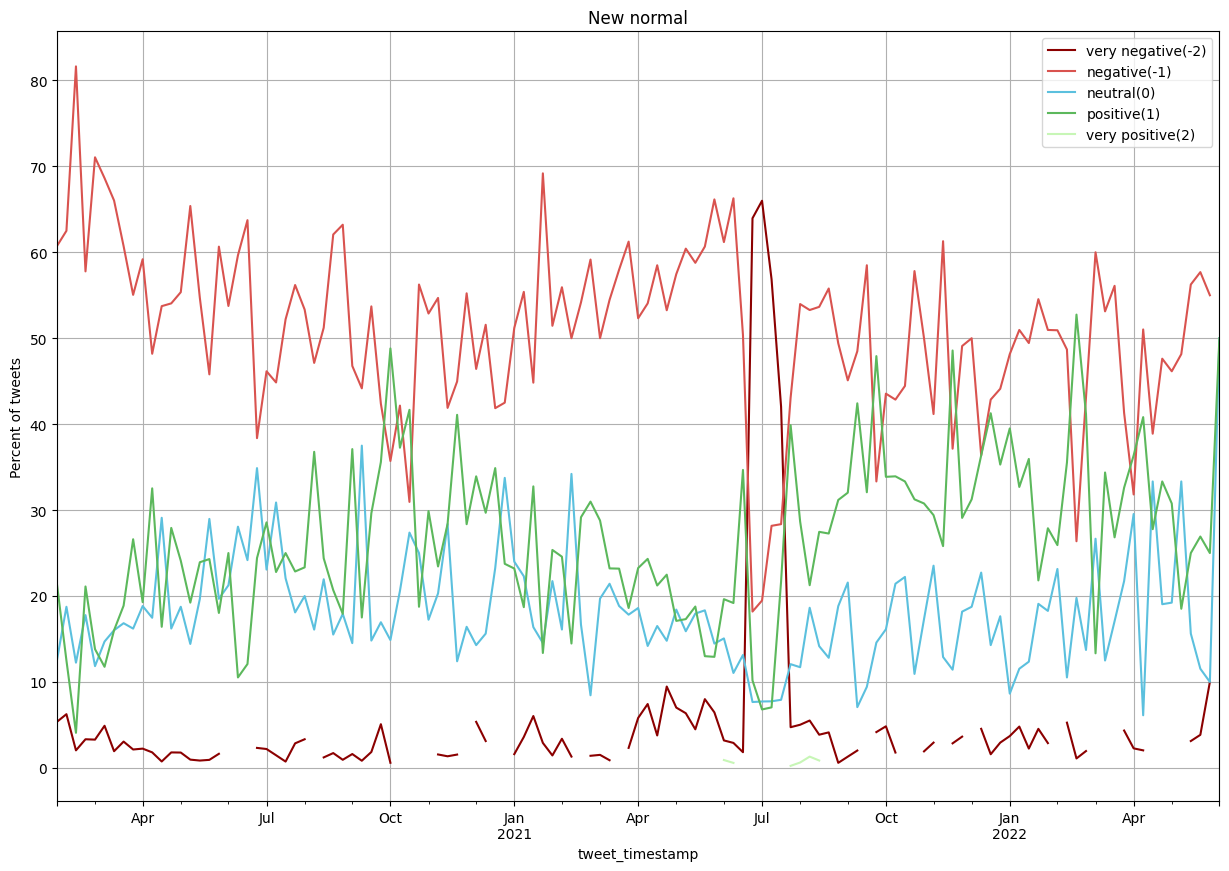

In [25]:
plt6 = df_health.unstack(level=-1).plot(title='New normal', grid=True,figsize=(15, 10),ylabel = 'Percent of tweets',color=['#8b0000','#d9534f','#5bc0de','#5cb85c','#c7f6b6'])
plt6.legend(label,loc = 'upper right')

In [26]:
df_tm= df.groupby([pd.Grouper(key='tweet_timestamp', axis=0,freq='M'),'topic_name']).size()

In [27]:
df_tm.unstack().idxmax(axis=1)

tweet_timestamp
2020-01-31      Restrictions
2020-02-29      Restrictions
2020-03-31        New Normal
2020-04-30        New Normal
2020-05-31        New Normal
2020-06-30        New Normal
2020-07-31      Case Reports
2020-08-31      Case Reports
2020-09-30        New Normal
2020-10-31    Global Economy
2020-11-30      Case Reports
2020-12-31      Case Reports
2021-01-31      Restrictions
2021-02-28        Treatments
2021-03-31        Treatments
2021-04-30        Treatments
2021-05-31        Treatments
2021-06-30          Olympics
2021-07-31          Olympics
2021-08-31        Treatments
2021-09-30        Treatments
2021-10-31        Treatments
2021-11-30        Treatments
2021-12-31        Treatments
2022-01-31        Treatments
2022-02-28        Treatments
2022-03-31        Treatments
2022-04-30        Treatments
2022-05-31      Restrictions
2022-06-30      Restrictions
Freq: M, dtype: object

In [28]:
df_march = df[(df['tweet_timestamp'] > '2021-03-02 00:00:00') & (df['tweet_timestamp'] < '2021-03-30 23:00:00')]

In [29]:
df_groups_march = df_march.groupby('topic_name').size()
df_groups_march.sort_values()

topic_name
Origin of the Virus     165
Hospital Shortage       185
Misinformation          340
Events                  371
Olympics                387
Health                  629
Preventing Covid        686
Case Reports            695
Global Economy          976
Restrictions           1099
New Normal             1156
Treatments             1267
dtype: int64

In [30]:
import pickle
filehandler = open('gdsmm1_topics.model', 'rb')
mgp1 = pickle.load(filehandler)

FileNotFoundError: [Errno 2] No such file or directory: 'gdsmm1_topics.model'

In [ ]:
import numpy as np
def top_words(cluster_word_distribution, top_cluster, values):
    '''prints the top words in each cluster'''
    for cluster in top_cluster:
        sort_dicts =sorted(mgp1.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — —')
doc_count = np.array(mgp1.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)

# topics sorted by the number of documents they are allocated to
top_index = doc_count.argsort()[-30:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)

# show the top 5 words in term frequency for each cluster 
topic_indices = np.arange(start=0, stop=len(doc_count), step=1)
top_words(mgp1.cluster_word_distribution, topic_indices, 10)

In [ ]:
df_imp = pd.read_csv('sttm_10topics_words.csv')
df_imp.info()
df_imp.head()

In [ ]:
import ast
l = ast.literal_eval(df_imp['word_importance'][0])
print(l)

In [ ]:
df_top = df_imp.groupby(df_imp['topic_name'])


In [ ]:
pd.set_option('display.max_rows', None)
df_top.get_group("Misinformation")['top_words'].values